# Nehla Shajahan case study 6

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
data = pd.read_excel('iris.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Looking for null values

In [6]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
data['SL'] = data['SL'].fillna(data['SL'].mean())

In [9]:
data.isna().sum()

SL                0
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [10]:
data['SW'] = data['SW'].fillna(data['SW'].mean())

In [11]:
data['PL']= data['PL'].fillna(data['PL'].mean())

In [12]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Checking for outliers

Text(0.5, 1.0, 'Box Plot of SW')

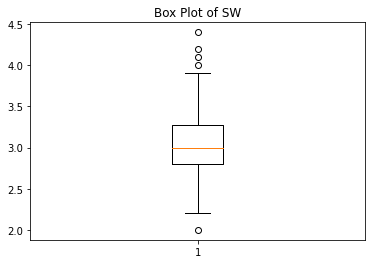

In [13]:
plt.boxplot(data['SW'])
plt.title('Box Plot of SW')

In [14]:
Q1 = np.percentile(data['SW'],25,interpolation ='midpoint') 
Q2 = np.percentile(data['SW'],50,interpolation ='midpoint')
Q3 = np.percentile(data['SW'],75,interpolation ='midpoint')

In [15]:
print (Q1)
print (Q2)
print (Q3)

2.8
3.0
3.25


In [16]:
IQR = Q3-Q1

In [17]:
print(IQR)

0.4500000000000002


In [18]:
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR

In [19]:
print(low_lim)
print(up_lim)

2.1249999999999996
3.9250000000000003


In [20]:
outlier = []
for x in data['SW']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [21]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [22]:
outlier.sort()

In [23]:
outlier

[2.0, 4.0, 4.1, 4.2, 4.4]

In [24]:
ind1 = data["SW"]>up_lim


data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [25]:
ind1 = data['SW']<low_lim
data.loc[ind1].index

Int64Index([60], dtype='int64')

In [26]:
data.drop([14, 15, 32, 33,60], inplace = True)

Text(0.5, 1.0, 'box Plot of  SW')

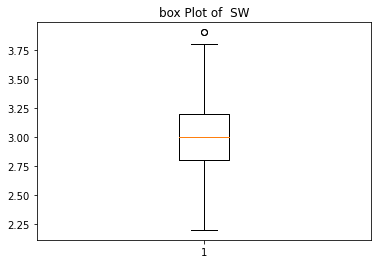

In [27]:
plt.boxplot(data['SW'])
plt.title('box Plot of  SW')

Text(0.5, 1.0, 'Box plot of SL')

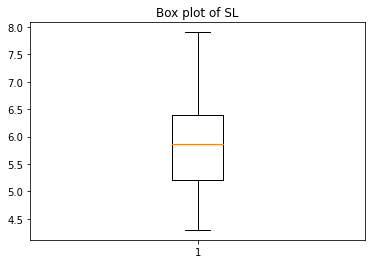

In [28]:
plt.boxplot(data['SL'])
plt.title('Box plot of SL')

Text(0.5, 1.0, 'Box plot of PW')

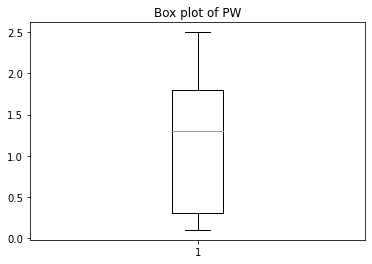

In [29]:
plt.boxplot(data['PW'])
plt.title('Box plot of PW')

Text(0.5, 1.0, 'Box plot of PL')

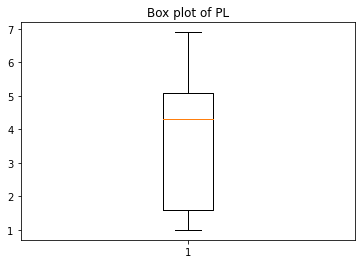

In [30]:
plt.boxplot(data['PL'])
plt.title('Box plot of PL')

# Splitting the data set

In [31]:
x = data.drop(['Classification'], axis=1)

In [32]:
y = data['Classification']

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, random_state=42, test_size=0.2)

In [34]:
x_train.shape

(116, 4)

In [35]:
x_train.shape

(116, 4)

# Logistic regression

In [36]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
y_pred = logit_model.predict(x_test)

C:\Users\Nehla Shajahan\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [38]:
print('Accuracy is:', accuracy_score(y_test,y_pred))

Accuracy is: 0.896551724137931


In [39]:
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))

Weighted F1-score: 0.90

Classification Report

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.80      0.89      0.84         9
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        29
      macro avg       0.90      0.90      0.90        29
   weighted avg       0.90      0.90      0.90        29



In [40]:
confusion_matrix(y_test, y_pred)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 2, 9]], dtype=int64)

# KNN model

In [41]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric= 'minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [42]:
acc_values

[0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.8620689655172413]

Text(0, 0.5, 'Accuracy')

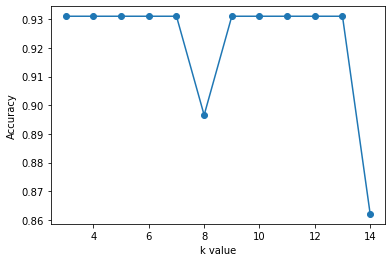

In [43]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')

In [44]:
classifier = KNeighborsClassifier(n_neighbors=3, metric= 'minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [45]:
print('Accuracy is:', accuracy_score(y_test,y_pred))

Accuracy is: 0.9310344827586207


In [46]:
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

Weighted F1-score: 0.93


In [47]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))


Classification Report

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        29
      macro avg       0.93      0.93      0.93        29
   weighted avg       0.93      0.93      0.93        29



In [48]:
confusion_matrix(y_test, y_pred)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

In [49]:
data.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,5.870287,3.025489,3.823017,1.226897
std,0.816690,0.374355,1.709115,0.758219
min,4.300000,2.200000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.855944,3.000000,4.300000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


# Standard Scaling

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [51]:
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
y_pred = logit_model.predict(x_test)

In [52]:
print('Accuracy is:', accuracy_score(y_test,y_pred))

Accuracy is: 0.9310344827586207


In [53]:
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

Weighted F1-score: 0.93


In [54]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))


Classification Report

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.82      1.00      0.90         9
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.93        29
      macro avg       0.94      0.94      0.93        29
   weighted avg       0.94      0.93      0.93        29



In [55]:
confusion_matrix(y_test, y_pred)

array([[9, 0, 0],
       [0, 9, 0],
       [0, 2, 9]], dtype=int64)

In [56]:
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=3, metric= 'minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'Accuracy')

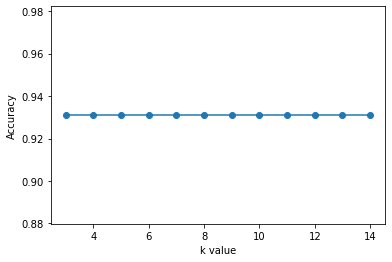

In [57]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')

In [58]:
classifier = KNeighborsClassifier(n_neighbors=3, metric= 'minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [59]:
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

Weighted F1-score: 0.93


In [60]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))


Classification Report

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        29
      macro avg       0.93      0.93      0.93        29
   weighted avg       0.93      0.93      0.93        29



In [61]:
print('Accuracy is:', accuracy_score(y_test,y_pred))

Accuracy is: 0.9310344827586207


# Decision Tree Model

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dt_model=DecisionTreeClassifier()

In [68]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [69]:
y_pred=dt_model.predict(x_test)

In [70]:
print('Accuracy on DecisionTree model is',accuracy_score(y_test,y_pred))

Accuracy on DecisionTree model is 0.8620689655172413


In [71]:
y_test.value_counts()

Iris-virginica     11
Iris-versicolor     9
Iris-setosa         9
Name: Classification, dtype: int64

In [72]:
confusion_matrix(y_test,y_pred)

array([[9, 0, 0],
       [0, 9, 0],
       [0, 4, 7]], dtype=int64)

# Linear SVM Model

In [73]:
from sklearn.svm import SVC

In [74]:
svm_linear=SVC(kernel='linear')

In [75]:
svm_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [76]:
y_pred=svm_linear.predict(x_test)

In [77]:
print('Accuracy using linear svm  is',accuracy_score(y_test,y_pred))

Accuracy using linear svm  is 0.9310344827586207


# Standardising the features

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
Sc=StandardScaler()

In [80]:
x_train=Sc.fit_transform(x_train)
x_test=Sc.fit_transform(x_test)

In [81]:
svm_linear=SVC(kernel='linear')

In [82]:
svm_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [83]:
print('Accuracy is',accuracy_score(y_test,y_pred))

Accuracy is 0.9310344827586207


# Polynomial SVM Model

In [84]:
SVM_poly=SVC(kernel='poly',degree=3)

In [85]:
SVM_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [86]:
y_pred=SVM_poly.predict(x_test)

In [87]:
print('Accuracy is',accuracy_score(y_test,y_pred))

Accuracy is 0.8620689655172413


# Radial SVM model

In [88]:
svm_radial=SVC(kernel='rbf')

In [89]:
svm_radial.fit(x_train,y_train)

SVC()

In [90]:
y_pred = svm_radial.predict(x_test)

In [91]:
print('Accuracy is', accuracy_score(y_test, y_pred))

Accuracy is 0.9310344827586207


# Random Forest Model

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
rf = RandomForestClassifier(n_estimators=20, random_state=0)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [94]:
print ("Accuracy on Random Forest mode is:", accuracy_score(y_test,y_test))

Accuracy on Random Forest mode is: 1.0


In [95]:
y_test.value_counts()

Iris-virginica     11
Iris-versicolor     9
Iris-setosa         9
Name: Classification, dtype: int64

After carrying out various analysis methods, we can conclude that standard scaling increases the accuracy of dataset to 0.93103 whereas other methods like decision tree, SVM, random forest etc which are having accuracy value of 0.862. So Standard Scaling is comparitively the better method of analysis in this case.